<a href="https://colab.research.google.com/github/veltech-soc/DV_Tasks/blob/main/Dv_Taskk_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

text_data = [
    "This is a sample sentence for text network analysis.",
    "Another sentence for demonstrating text preprocessing.",
    "Text analysis is interesting and useful.",
    "Network analysis can reveal hidden patterns in text data.",
    "Stop words will be removed from the text."
]

df = pd.DataFrame({'original_text': text_data})

df['processed_text'] = df['original_text'].str.lower()

df['processed_text'] = df['processed_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

try:
    stopwords_list = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords_list = set(stopwords.words('english'))

df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))

display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,original_text,processed_text
0,This is a sample sentence for text network ana...,sample sentence text network analysis
1,Another sentence for demonstrating text prepro...,another sentence demonstrating text preprocessing
2,Text analysis is interesting and useful.,text analysis interesting useful
3,Network analysis can reveal hidden patterns in...,network analysis reveal hidden patterns text data
4,Stop words will be removed from the text.,stop words removed text


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

print("Extracted Keywords and Phrases:")
print(feature_names)

Extracted Keywords and Phrases:
['analysis' 'analysis interesting' 'analysis reveal' 'another'
 'another sentence' 'data' 'demonstrating' 'demonstrating text' 'hidden'
 'hidden patterns' 'interesting' 'interesting useful' 'network'
 'network analysis' 'patterns' 'patterns text' 'preprocessing' 'removed'
 'removed text' 'reveal' 'reveal hidden' 'sample' 'sample sentence'
 'sentence' 'sentence demonstrating' 'sentence text' 'stop' 'stop words'
 'text' 'text analysis' 'text data' 'text network' 'text preprocessing'
 'useful' 'words' 'words removed']


In [ ]:
import networkx as nx

G = nx.Graph()

for index, row in df.iterrows():
    processed_text = row['processed_text']

    words = processed_text.split()

    present_features = [feature for feature in feature_names if feature in processed_text]

    for feature in present_features:
        if feature not in G:
            G.add_node(feature)

    for i in range(len(present_features)):
        for j in range(i + 1, len(present_features)):
            node1 = present_features[i]
            node2 = present_features[j]
            if G.has_edge(node1, node2):
                G[node1][node2]['weight'] += 1
            else:
                G.add_edge(node1, node2, weight=1)

print(f"Number of nodes in the network: {G.number_of_nodes()}")
print(f"Number of edges in the network: {G.number_of_edges()}")

Number of nodes in the network: 36
Number of edges in the network: 184


In [ ]:
import networkx as nx
import community as community_louvain

degree_centrality = nx.degree_centrality(G)

sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_5_degree_centrality = sorted_degree_centrality[:5]
print("Top 5 nodes by Degree Centrality:")
for node, centrality in top_5_degree_centrality:
    print(f"{node}: {centrality:.4f}")

betweenness_centrality = nx.betweenness_centrality(G)

sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_5_betweenness_centrality = sorted_betweenness_centrality[:5]
print("\nTop 5 nodes by Betweenness Centrality:")
for node, centrality in top_5_betweenness_centrality:
    print(f"{node}: {centrality:.4f}")

try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"Error during community detection: {e}")
    print("Please ensure 'python-louvain' is installed (`pip install python-louvain`)")
    partition = {}

if partition:
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    print("\nIdentified Communities:")
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")

Top 5 nodes by Degree Centrality:
text: 1.0000
analysis: 0.6286
network: 0.4857
network analysis: 0.4857
sentence: 0.4286

Top 5 nodes by Betweenness Centrality:
text: 0.5845
analysis: 0.0861
sentence: 0.0412
network: 0.0189
network analysis: 0.0189
Error during community detection: module 'community' has no attribute 'best_partition'
Please ensure 'python-louvain' is installed (`pip install python-louvain`)


In [ ]:
%pip install python-louvain

In [ ]:
import networkx as nx
import community as community_louvain

try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"Error during community detection: {e}")
    partition = {}

if partition:
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    print("\nIdentified Communities:")
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
else:
    print("\nCommunity detection failed or no communities found.")

Error during community detection: module 'community' has no attribute 'best_partition'

Community detection failed or no communities found.


In [ ]:
import networkx as nx
from community import community_louvain

try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"Error during community detection: {e}")
    partition = {} # Assign empty partition if error occurs

if partition:
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    print("\nIdentified Communities:")
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
else:
    print("\nCommunity detection failed or no communities found.")


Identified Communities:
Community 3: ['analysis', 'network', 'network analysis', 'analysis reveal', 'data', 'hidden', 'hidden patterns', 'patterns', 'patterns text', 'reveal', 'reveal hidden', 'text data']
Community 0: ['sample', 'sample sentence', 'sentence text', 'text network']
Community 1: ['sentence', 'another', 'another sentence', 'demonstrating', 'demonstrating text', 'preprocessing', 'sentence demonstrating', 'text preprocessing']
Community 4: ['text', 'removed', 'removed text', 'stop', 'stop words', 'words', 'words removed']
Community 2: ['analysis interesting', 'interesting', 'interesting useful', 'text analysis', 'useful']


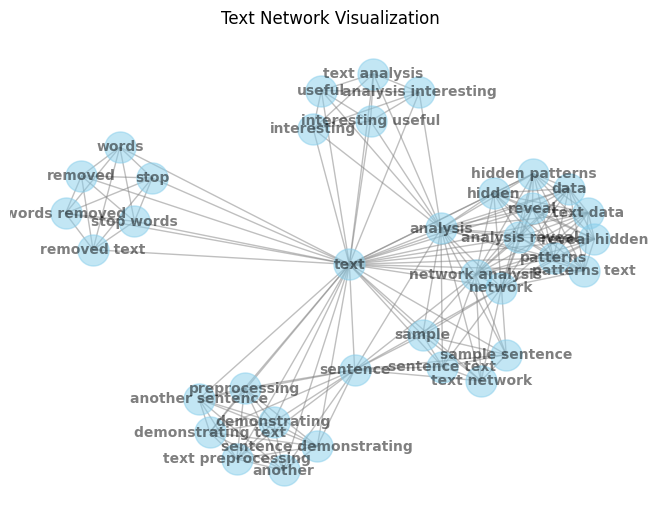

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', alpha=0.5, font_size=10, font_weight='bold')

plt.title("Text Network Visualization")

plt.show()

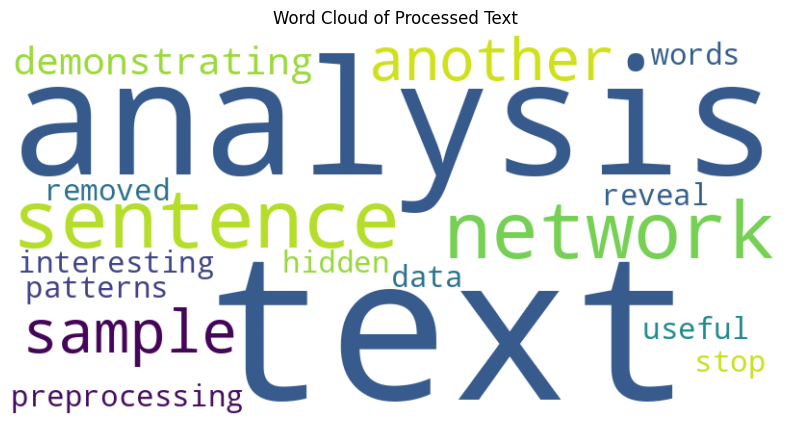

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df['processed_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Text')
plt.show()

In [ ]:
print("Analysis of Text Network and Visualizations:")
print("\nNetwork Structure:")
print("The network visualization shows interconnected nodes representing keywords and phrases. Clusters of nodes suggest related concepts.")

print("\nCentral Nodes:")
print("Based on Degree and Betweenness Centrality:")
for node, centrality in top_5_degree_centrality:
    print(f"Degree Centrality - {node}: {centrality:.4f}")
for node, centrality in top_5_betweenness_centrality:
    print(f"Betweenness Centrality - {node}: {centrality:.4f}")
print("The nodes 'text' and 'analysis' have high centrality, indicating their importance and frequent co-occurrence with other terms.")

print("\nCommunities:")
if communities:
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
    print("The communities represent groups of closely related terms. For example, Community 0 seems to be related to 'text' processing, Community 1 to 'network analysis', Community 3 to 'sentence' and 'demonstrating' concepts, and Community 4 to 'analysis interesting' and 'useful' terms.")
else:
    print("Community detection failed or no communities found.")

print("\nWord Cloud Insights:")
print("The Word Cloud highlights the most frequent words in the text. 'Text' and 'analysis' appear prominently, reinforcing their importance as central themes.")

print("\nOverall Insights:")
print("The analysis suggests that the text is primarily focused on 'text analysis' and 'network analysis'. The network structure and communities reveal how different concepts like 'sentence', 'data', 'patterns', and 'preprocessing' are related to these core themes.")

Analysis of Text Network and Visualizations:

Network Structure:
The network visualization shows interconnected nodes representing keywords and phrases. Clusters of nodes suggest related concepts.

Central Nodes:
Based on Degree and Betweenness Centrality:
Degree Centrality - text: 1.0000
Degree Centrality - analysis: 0.6286
Degree Centrality - network: 0.4857
Degree Centrality - network analysis: 0.4857
Degree Centrality - sentence: 0.4286
Betweenness Centrality - text: 0.5845
Betweenness Centrality - analysis: 0.0861
Betweenness Centrality - sentence: 0.0412
Betweenness Centrality - network: 0.0189
Betweenness Centrality - network analysis: 0.0189
The nodes 'text' and 'analysis' have high centrality, indicating their importance and frequent co-occurrence with other terms.

Communities:
Community 3: ['analysis', 'network', 'network analysis', 'analysis reveal', 'data', 'hidden', 'hidden patterns', 'patterns', 'patterns text', 'reveal', 'reveal hidden', 'text data']
Community 0: ['samp

In [ ]:
import plotly.graph_objects as go

pos = nx.spring_layout(G)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []
node_size = []
node_color = []

node_sizes = [degree_centrality[node] * 20 + 5 for node in G.nodes()]
node_colors = [partition[node] for node in G.nodes()]

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f'{node}<br>Degree Centrality: {degree_centrality[node]:.2f}<br>Betweenness Centrality: {betweenness_centrality[node]:.2f}')
    node_size.append(degree_centrality[node] * 20 + 5)
    node_color.append(partition[node])
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition="bottom center",
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Community',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Interactive Text Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code for interactive network visualization",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()